In [2]:
import scanpy as sc
import numpy as np
import velocyto as vc
import loompy as lp
import scvelo as scv
# import cellrank as cr
import matplotlib.pyplot as plt

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
# cr.settings.verbosity = 2

In [3]:
adata = scv.read('./HCC_tcell.h5ad')

In [4]:
adata.raw.X.shape

(52813, 18782)

In [5]:
adata.obs['seurat_clusters']

P136A1_AAACCCAGTCATTCCC-1    5
P136A1_AAACCCAGTGTTAACC-1    5
P136A1_AAACGAAAGCGCCCAT-1    5
P136A1_AAACGCTCAGAGGACT-1    1
P136A1_AAAGGATAGGCTATCT-1    6
                            ..
P138B2_TTGTTGTTCTATGCCC-1    7
P138B2_TTTACCACACCTGCGA-1    7
P138B2_TTTCAGTGTGTATACC-1    7
P138B2_TTTCCTCGTTATGTGC-1    7
P138B2_TTTGTTGAGGAATCGC-1    7
Name: seurat_clusters, Length: 52813, dtype: int32

In [6]:
dict = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9}
adata.obs['clusters'] = adata.obs['seurat_clusters'].values
adata.obs = adata.obs.replace({"clusters": dict})

dict2 = {0:"HCC_008_iso", 1:"HCC_008_anti", 2:"HCC_004_iso", 3:"HCC_004_anti"}
adata.obs['name'] = adata.obs['group'].values
adata.obs = adata.obs.replace({'name': dict2})

adata.obs


orig.ident  nCount_RNA  nFeature_RNA  \
P136A1_AAACCCAGTCATTCCC-1     P136A1      1572.0           758   
P136A1_AAACCCAGTGTTAACC-1     P136A1      1623.5           702   
P136A1_AAACGAAAGCGCCCAT-1     P136A1      1684.0           783   
P136A1_AAACGCTCAGAGGACT-1     P136A1      2151.0           853   
P136A1_AAAGGATAGGCTATCT-1     P136A1      1529.0           756   
...                              ...         ...           ...   
P138B2_TTGTTGTTCTATGCCC-1     P138B2      8819.5          2471   
P138B2_TTTACCACACCTGCGA-1     P138B2      6512.0          1921   
P138B2_TTTCAGTGTGTATACC-1     P138B2      7407.0          2398   
P138B2_TTTCCTCGTTATGTGC-1     P138B2      6206.0          2025   
P138B2_TTTGTTGAGGAATCGC-1     P138B2     16440.0          3461   

                           RNA_snn_res.0.5  seurat_clusters  Doublet  time  \
P136A1_AAACCCAGTCATTCCC-1                5                5  Singlet     1   
P136A1_AAACCCAGTGTTAACC-1                5                5  Singlet     1   
P136A1_AAACGAAAGCGCCCAT-1                5                5  Singlet     1   
P136A1_AAACGCTCAGAGGACT-1                1                1  Singlet     1   
P136A1_AAAGGATAGGCTATCT-1                6                6  Singlet     1   
...                                    ...              ...      ...   ...   
P138B2_TTGTTGTTCTATGCCC-1                7                7  Singlet     0   
P138B2_TTTACCACACCTGCGA-1                7                7  Singlet     0   
P138B2_TTTCAGTGTGTATACC-1                7                7  Singlet     0   
P138B2_TTTCCTCGTTATGTGC-1                7                7  Singlet     0   
P138B2_TTTGTTGAGGAATCGC-1                7                7  Singlet     0   

                           treat  group  group8       cp1      eff1  exhaust1  \
P136A1_AAACCCAGTCATTCCC-1      1      2       4  0.134946 -0.352986  0.107861   
P136A1_AAACCCAGTGTTAACC-1      1      2       4  0.114406  0.452065  0.150557   
P136A1_AAACGAAAGCGCCCAT-1      1      2       4 -0.191041  0.027057  0.191332   
P136A1_AAACGCTCAGAGGACT-1      1      2       4  0.320855  0.978875 -0.071752   
P136A1_AAAGGATAGGCTATCT-1      1      2       4 -0.650304  0.338265 -0.328578   
...                          ...    ...     ...       ...       ...       ...   
P138B2_TTGTTGTTCTATGCCC-1      0      1       3  0.221406  0.046834 -0.004859   
P138B2_TTTACCACACCTGCGA-1      0      1       3 -0.614912 -0.319712 -0.567326   
P138B2_TTTCAGTGTGTATACC-1      0      1       3 -0.563780 -0.663497 -0.525956   
P138B2_TTTCCTCGTTATGTGC-1      0      1       3 -0.416757 -0.537410 -0.535488   
P138B2_TTTGTTGAGGAATCGC-1      0      1       3 -0.240106  0.932791 -0.206617   

                           clusters          name  
P136A1_AAACCCAGTCATTCCC-1         6   HCC_004_iso  
P136A1_AAACCCAGTGTTAACC-1         6   HCC_004_iso  
P136A1_AAACGAAAGCGCCCAT-1         6   HCC_004_iso  
P136A1_AAACGCTCAGAGGACT-1         2   HCC_004_iso  
P136A1_AAAGGATAGGCTATCT-1         7   HCC_004_iso  
...                             ...           ...  
P138B2_TTGTTGTTCTATGCCC-1         8  HCC_008_anti  
P138B2_TTTACCACACCTGCGA-1         8  HCC_008_anti  
P138B2_TTTCAGTGTGTATACC-1         8  HCC_008_anti  
P138B2_TTTCCTCGTTATGTGC-1         8  HCC_008_anti  
P138B2_TTTGTTGAGGAATCGC-1         8  HCC_008_anti  

[52813 rows x 15 columns]

In [8]:
adata.obs_names

Index(['HCC_004_iso_AAACCCAGTCATTCCC-1', 'HCC_004_iso_AAACCCAGTGTTAACC-1',
       'HCC_004_iso_AAACGAAAGCGCCCAT-1', 'HCC_004_iso_AAACGCTCAGAGGACT-1',
       'HCC_004_iso_AAAGGATAGGCTATCT-1', 'HCC_004_iso_AAAGGTATCCTTCGAC-1',
       'HCC_004_iso_AAAGGTATCGAGCCTG-1', 'HCC_004_iso_AAATGGAAGATGAAGG-1',
       'HCC_004_iso_AAATGGAGTAACGATA-1', 'HCC_004_iso_AAATGGAGTCTACACA-1',
       ...
       'P138B2_TTGACCCTCACAACCA-1', 'P138B2_TTGCATTGTGTTCGAT-1',
       'P138B2_TTGGGTATCGCTGTTC-1', 'P138B2_TTGTGGAGTACCATAC-1',
       'P138B2_TTGTTCAAGAGCCGTA-1', 'P138B2_TTGTTGTTCTATGCCC-1',
       'P138B2_TTTACCACACCTGCGA-1', 'P138B2_TTTCAGTGTGTATACC-1',
       'P138B2_TTTCCTCGTTATGTGC-1', 'P138B2_TTTGTTGAGGAATCGC-1'],
      dtype='object', length=52813)

In [11]:
# replace cellID to match loom file
# replace PxxxXx -> HCC_xxx_xxx
adata.obs_names = adata.obs_names.str.replace('P136A1', 'HCC_004_iso').str.replace('P136A2','HCC_004_iso').str.replace('P136B1','HCC_004_anti').str.replace('P136B2','HCC_004_anti').str.replace('P138A1','HCC_008_iso').str.replace('P138A2','HCC_008_iso').str.replace('P138B1','HCC_008_anti').str.replace('P138B2','HCC_008_anti')

In [12]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  \
HCC_004_iso_AAACCCAGTCATTCCC-1      P136A1      1572.0           758   
HCC_004_iso_AAACCCAGTGTTAACC-1      P136A1      1623.5           702   
HCC_004_iso_AAACGAAAGCGCCCAT-1      P136A1      1684.0           783   
HCC_004_iso_AAACGCTCAGAGGACT-1      P136A1      2151.0           853   
HCC_004_iso_AAAGGATAGGCTATCT-1      P136A1      1529.0           756   
...                                    ...         ...           ...   
HCC_008_anti_TTGTTGTTCTATGCCC-1     P138B2      8819.5          2471   
HCC_008_anti_TTTACCACACCTGCGA-1     P138B2      6512.0          1921   
HCC_008_anti_TTTCAGTGTGTATACC-1     P138B2      7407.0          2398   
HCC_008_anti_TTTCCTCGTTATGTGC-1     P138B2      6206.0          2025   
HCC_008_anti_TTTGTTGAGGAATCGC-1     P138B2     16440.0          3461   

                                 RNA_snn_res.0.5  seurat_clusters  Doublet  \
HCC_004_iso_AAACCCAGTCATTCCC-1                 5                5  Singlet   
HCC_004_iso_AAACCCAGTGTTAACC-1                 5                5  Singlet   
HCC_004_iso_AAACGAAAGCGCCCAT-1                 5                5  Singlet   
HCC_004_iso_AAACGCTCAGAGGACT-1                 1                1  Singlet   
HCC_004_iso_AAAGGATAGGCTATCT-1                 6                6  Singlet   
...                                          ...              ...      ...   
HCC_008_anti_TTGTTGTTCTATGCCC-1                7                7  Singlet   
HCC_008_anti_TTTACCACACCTGCGA-1                7                7  Singlet   
HCC_008_anti_TTTCAGTGTGTATACC-1                7                7  Singlet   
HCC_008_anti_TTTCCTCGTTATGTGC-1                7                7  Singlet   
HCC_008_anti_TTTGTTGAGGAATCGC-1                7                7  Singlet   

                                 time  treat  group  group8       cp1  \
HCC_004_iso_AAACCCAGTCATTCCC-1      1      1      2       4  0.134946   
HCC_004_iso_AAACCCAGTGTTAACC-1      1      1      2       4  0.114406   
HCC_004_iso_AAACGAAAGCGCCCAT-1      1      1      2       4 -0.191041   
HCC_004_iso_AAACGCTCAGAGGACT-1      1      1      2       4  0.320855   
HCC_004_iso_AAAGGATAGGCTATCT-1      1      1      2       4 -0.650304   
...                               ...    ...    ...     ...       ...   
HCC_008_anti_TTGTTGTTCTATGCCC-1     0      0      1       3  0.221406   
HCC_008_anti_TTTACCACACCTGCGA-1     0      0      1       3 -0.614912   
HCC_008_anti_TTTCAGTGTGTATACC-1     0      0      1       3 -0.563780   
HCC_008_anti_TTTCCTCGTTATGTGC-1     0      0      1       3 -0.416757   
HCC_008_anti_TTTGTTGAGGAATCGC-1     0      0      1       3 -0.240106   

                                     eff1  exhaust1  clusters          name  
HCC_004_iso_AAACCCAGTCATTCCC-1  -0.352986  0.107861         6   HCC_004_iso  
HCC_004_iso_AAACCCAGTGTTAACC-1   0.452065  0.150557         6   HCC_004_iso  
HCC_004_iso_AAACGAAAGCGCCCAT-1   0.027057  0.191332         6   HCC_004_iso  
HCC_004_iso_AAACGCTCAGAGGACT-1   0.978875 -0.071752         2   HCC_004_iso  
HCC_004_iso_AAAGGATAGGCTATCT-1   0.338265 -0.328578         7   HCC_004_iso  
...                                   ...       ...       ...           ...  
HCC_008_anti_TTGTTGTTCTATGCCC-1  0.046834 -0.004859         8  HCC_008_anti  
HCC_008_anti_TTTACCACACCTGCGA-1 -0.319712 -0.567326         8  HCC_008_anti  
HCC_008_anti_TTTCAGTGTGTATACC-1 -0.663497 -0.525956         8  HCC_008_anti  
HCC_008_anti_TTTCCTCGTTATGTGC-1 -0.537410 -0.535488         8  HCC_008_anti  
HCC_008_anti_TTTGTTGAGGAATCGC-1  0.932791 -0.206617         8  HCC_008_anti  

[52813 rows x 15 columns]

In [13]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  \
HCC_004_iso_AAACCCAGTCATTCCC-1      P136A1      1572.0           758   
HCC_004_iso_AAACCCAGTGTTAACC-1      P136A1      1623.5           702   
HCC_004_iso_AAACGAAAGCGCCCAT-1      P136A1      1684.0           783   
HCC_004_iso_AAACGCTCAGAGGACT-1      P136A1      2151.0           853   
HCC_004_iso_AAAGGATAGGCTATCT-1      P136A1      1529.0           756   
...                                    ...         ...           ...   
HCC_008_anti_TTGTTGTTCTATGCCC-1     P138B2      8819.5          2471   
HCC_008_anti_TTTACCACACCTGCGA-1     P138B2      6512.0          1921   
HCC_008_anti_TTTCAGTGTGTATACC-1     P138B2      7407.0          2398   
HCC_008_anti_TTTCCTCGTTATGTGC-1     P138B2      6206.0          2025   
HCC_008_anti_TTTGTTGAGGAATCGC-1     P138B2     16440.0          3461   

                                 RNA_snn_res.0.5  seurat_clusters  Doublet  \
HCC_004_iso_AAACCCAGTCATTCCC-1                 5                5  Singlet   
HCC_004_iso_AAACCCAGTGTTAACC-1                 5                5  Singlet   
HCC_004_iso_AAACGAAAGCGCCCAT-1                 5                5  Singlet   
HCC_004_iso_AAACGCTCAGAGGACT-1                 1                1  Singlet   
HCC_004_iso_AAAGGATAGGCTATCT-1                 6                6  Singlet   
...                                          ...              ...      ...   
HCC_008_anti_TTGTTGTTCTATGCCC-1                7                7  Singlet   
HCC_008_anti_TTTACCACACCTGCGA-1                7                7  Singlet   
HCC_008_anti_TTTCAGTGTGTATACC-1                7                7  Singlet   
HCC_008_anti_TTTCCTCGTTATGTGC-1                7                7  Singlet   
HCC_008_anti_TTTGTTGAGGAATCGC-1                7                7  Singlet   

                                 time  treat  group  group8       cp1  \
HCC_004_iso_AAACCCAGTCATTCCC-1      1      1      2       4  0.134946   
HCC_004_iso_AAACCCAGTGTTAACC-1      1      1      2       4  0.114406   
HCC_004_iso_AAACGAAAGCGCCCAT-1      1      1      2       4 -0.191041   
HCC_004_iso_AAACGCTCAGAGGACT-1      1      1      2       4  0.320855   
HCC_004_iso_AAAGGATAGGCTATCT-1      1      1      2       4 -0.650304   
...                               ...    ...    ...     ...       ...   
HCC_008_anti_TTGTTGTTCTATGCCC-1     0      0      1       3  0.221406   
HCC_008_anti_TTTACCACACCTGCGA-1     0      0      1       3 -0.614912   
HCC_008_anti_TTTCAGTGTGTATACC-1     0      0      1       3 -0.563780   
HCC_008_anti_TTTCCTCGTTATGTGC-1     0      0      1       3 -0.416757   
HCC_008_anti_TTTGTTGAGGAATCGC-1     0      0      1       3 -0.240106   

                                     eff1  exhaust1  clusters          name  
HCC_004_iso_AAACCCAGTCATTCCC-1  -0.352986  0.107861         6   HCC_004_iso  
HCC_004_iso_AAACCCAGTGTTAACC-1   0.452065  0.150557         6   HCC_004_iso  
HCC_004_iso_AAACGAAAGCGCCCAT-1   0.027057  0.191332         6   HCC_004_iso  
HCC_004_iso_AAACGCTCAGAGGACT-1   0.978875 -0.071752         2   HCC_004_iso  
HCC_004_iso_AAAGGATAGGCTATCT-1   0.338265 -0.328578         7   HCC_004_iso  
...                                   ...       ...       ...           ...  
HCC_008_anti_TTGTTGTTCTATGCCC-1  0.046834 -0.004859         8  HCC_008_anti  
HCC_008_anti_TTTACCACACCTGCGA-1 -0.319712 -0.567326         8  HCC_008_anti  
HCC_008_anti_TTTCAGTGTGTATACC-1 -0.663497 -0.525956         8  HCC_008_anti  
HCC_008_anti_TTTCCTCGTTATGTGC-1 -0.537410 -0.535488         8  HCC_008_anti  
HCC_008_anti_TTTGTTGAGGAATCGC-1  0.932791 -0.206617         8  HCC_008_anti  

[52813 rows x 15 columns]

In [ ]:
#HCC_loom = ["../../HCC_fastq/HCC_004_iso.loom", "../../HCC_fastq/HCC_004_anti.loom", "../../HCC_fastq/HCC_008_iso.loom", "../../HCC_fastq/HCC_008_anti.loom"]
#lp.combine(HCC_loom, "HCC.loom")

: 

In [14]:
HCCloom = scv.read("HCC.loom", cache=True)


In [15]:
HCCloom.obs_names

Index(['HCC_004_iso_AAACCCAAGAAGCCAC', 'HCC_004_iso_AAACCCAAGAAGTATC',
       'HCC_004_iso_AAACCCAAGAGGTATT', 'HCC_004_iso_AAACCCAAGGATACCG',
       'HCC_004_iso_AAACCCAAGGCACCAA', 'HCC_004_iso_AAACCCAAGGTCATCT',
       'HCC_004_iso_AAACCCAAGTACAGAT', 'HCC_004_iso_AAACCCAAGTCAAGCG',
       'HCC_004_iso_AAACCCAAGTTCATGC', 'HCC_004_iso_AAACCCACACGACAGA',
       ...
       'HCC_008_anti_TTTGTTGAGTTCCAGT', 'HCC_008_anti_TTTGTTGAGTTTCTTC',
       'HCC_008_anti_TTTGTTGCAACCGCCA', 'HCC_008_anti_TTTGTTGCATCTCCCA',
       'HCC_008_anti_TTTGTTGGTCAGGAGT', 'HCC_008_anti_TTTGTTGGTCCACATA',
       'HCC_008_anti_TTTGTTGGTGAGTCAG', 'HCC_008_anti_TTTGTTGGTTCAAAGA',
       'HCC_008_anti_TTTGTTGGTTCGAACT', 'HCC_008_anti_TTTGTTGTCAAACCCA'],
      dtype='object', name='CellID', length=68206)

In [16]:
scv.utils.clean_obs_names(adata)
scv.utils.clean_obs_names(HCCloom)

In [17]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  RNA_snn_res.0.5  \
AAACCCAGTCAT       P136A1      1572.0           758                5   
AAACCCAGTGTT       P136A1      1623.5           702                5   
AAACGAAAGCGC       P136A1      1684.0           783                5   
AAACGCTCAGAG       P136A1      2151.0           853                1   
AAAGGATAGGCT       P136A1      1529.0           756                6   
...                   ...         ...           ...              ...   
_TTGTTGTTCTA-1     P138B2      8819.5          2471                7   
_TTTACCACACC       P138B2      6512.0          1921                7   
_TTTCAGTGTGT-1     P138B2      7407.0          2398                7   
_TTTCCTCGTTA       P138B2      6206.0          2025                7   
_TTTGTTGAGGA-1     P138B2     16440.0          3461                7   

                seurat_clusters  Doublet  time  treat  group  group8  \
AAACCCAGTCAT                  5  Singlet     1      1      2       4   
AAACCCAGTGTT                  5  Singlet     1      1      2       4   
AAACGAAAGCGC                  5  Singlet     1      1      2       4   
AAACGCTCAGAG                  1  Singlet     1      1      2       4   
AAAGGATAGGCT                  6  Singlet     1      1      2       4   
...                         ...      ...   ...    ...    ...     ...   
_TTGTTGTTCTA-1                7  Singlet     0      0      1       3   
_TTTACCACACC                  7  Singlet     0      0      1       3   
_TTTCAGTGTGT-1                7  Singlet     0      0      1       3   
_TTTCCTCGTTA                  7  Singlet     0      0      1       3   
_TTTGTTGAGGA-1                7  Singlet     0      0      1       3   

                     cp1      eff1  exhaust1  clusters          name  \
AAACCCAGTCAT    0.134946 -0.352986  0.107861         6   HCC_004_iso   
AAACCCAGTGTT    0.114406  0.452065  0.150557         6   HCC_004_iso   
AAACGAAAGCGC   -0.191041  0.027057  0.191332         6   HCC_004_iso   
AAACGCTCAGAG    0.320855  0.978875 -0.071752         2   HCC_004_iso   
AAAGGATAGGCT   -0.650304  0.338265 -0.328578         7   HCC_004_iso   
...                  ...       ...       ...       ...           ...   
_TTGTTGTTCTA-1  0.221406  0.046834 -0.004859         8  HCC_008_anti   
_TTTACCACACC   -0.614912 -0.319712 -0.567326         8  HCC_008_anti   
_TTTCAGTGTGT-1 -0.563780 -0.663497 -0.525956         8  HCC_008_anti   
_TTTCCTCGTTA   -0.416757 -0.537410 -0.535488         8  HCC_008_anti   
_TTTGTTGAGGA-1 -0.240106  0.932791 -0.206617         8  HCC_008_anti   

                       sample_batch  
AAACCCAGTCAT     HCC_004_iso_TCCC-1  
AAACCCAGTGTT     HCC_004_iso_AACC-1  
AAACGAAAGCGC     HCC_004_iso_CCAT-1  
AAACGCTCAGAG     HCC_004_iso_GACT-1  
AAAGGATAGGCT     HCC_004_iso_ATCT-1  
...                             ...  
_TTGTTGTTCTA-1  HCC_008_antiTGCCC-1  
_TTTACCACACC    HCC_008_antiTGCGA-1  
_TTTCAGTGTGT-1  HCC_008_antiATACC-1  
_TTTCCTCGTTA    HCC_008_antiTGTGC-1  
_TTTGTTGAGGA-1  HCC_008_antiATCGC-1  

[52813 rows x 16 columns]

In [18]:
HCCloom.obs

TotalUMIs       sample_batch
AAACCCAAGAAG         2752   HCC_004_iso_CCAC
AAACCCAAGAAG-1      21993   HCC_004_iso_TATC
AAACCCAAGAGG        23189   HCC_004_iso_TATT
AAACCCAAGGAT         4014   HCC_004_iso_ACCG
AAACCCAAGGCA         2735   HCC_004_iso_CCAA
...                   ...                ...
_TTTGTTGGTCC         3987  HCC_008_antiACATA
_TTTGTTGGTGA-2       3052  HCC_008_antiGTCAG
_TTTGTTGGTTC         6546  HCC_008_antiAAAGA
_TTTGTTGGTTC-1       5103  HCC_008_antiGAACT
_TTTGTTGTCAA-1       5672  HCC_008_antiACCCA

[68206 rows x 2 columns]

In [19]:
HCC_T_cell = scv.utils.merge(adata, HCCloom)
HCC_T_cell

AnnData object with n_obs × n_vars = 42960 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.5', 'seurat_clusters', 'Doublet', 'time', 'treat', 'group', 'group8', 'cp1', 'eff1', 'exhaust1', 'clusters', 'name', 'sample_batch', 'TotalUMIs', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTFi (TcoF-DB)', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'Regulates (TRRUST)', 'RgdID', 'Strand', 'UcscID', 'UniprotID', 'VegaID'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'HARMONY', 'PCs'
    layers: 'matrix', 'spliced', 'unspliced'
    obsp: 'distances'

In [20]:
scv.pp.filter_and_normalize(HCC_T_cell)
scv.pp.moments(HCC_T_cell)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:21) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [22]:
scv.tl.recover_dynamics(HCC_T_cell, n_jobs=10)

recovering dynamics (using 10/16 cores)
    finished (0:06:36) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [23]:
scv.tl.velocity(HCC_T_cell, mode='dynamical')

computing velocities
    finished (0:00:12) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [24]:
scv.tl.velocity_graph(HCC_T_cell, n_jobs = 4)

computing velocity graph (using 4/16 cores)
    finished (0:01:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:08) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


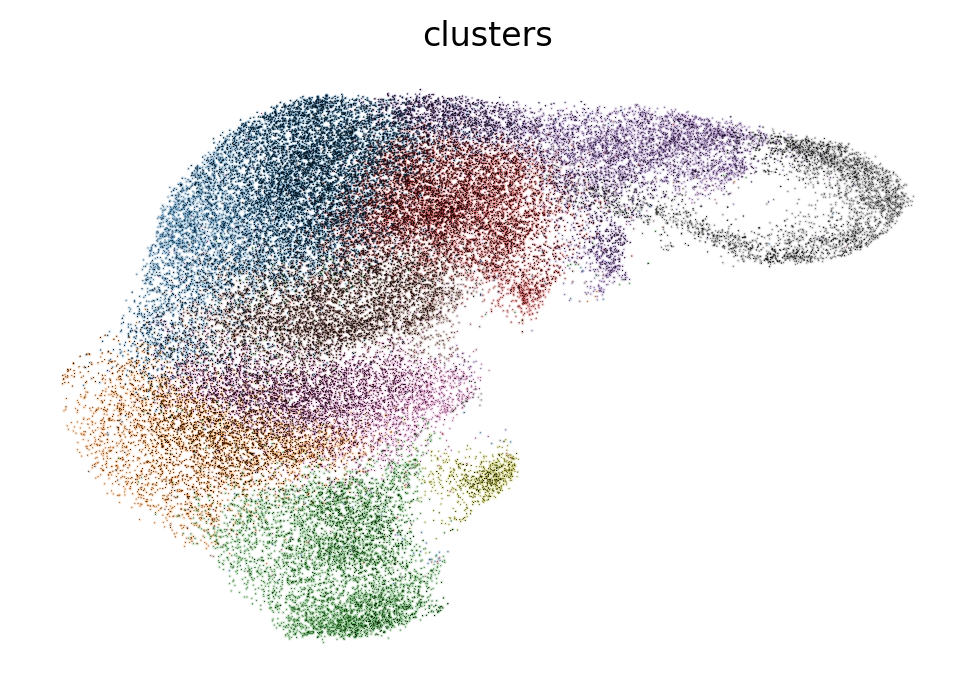

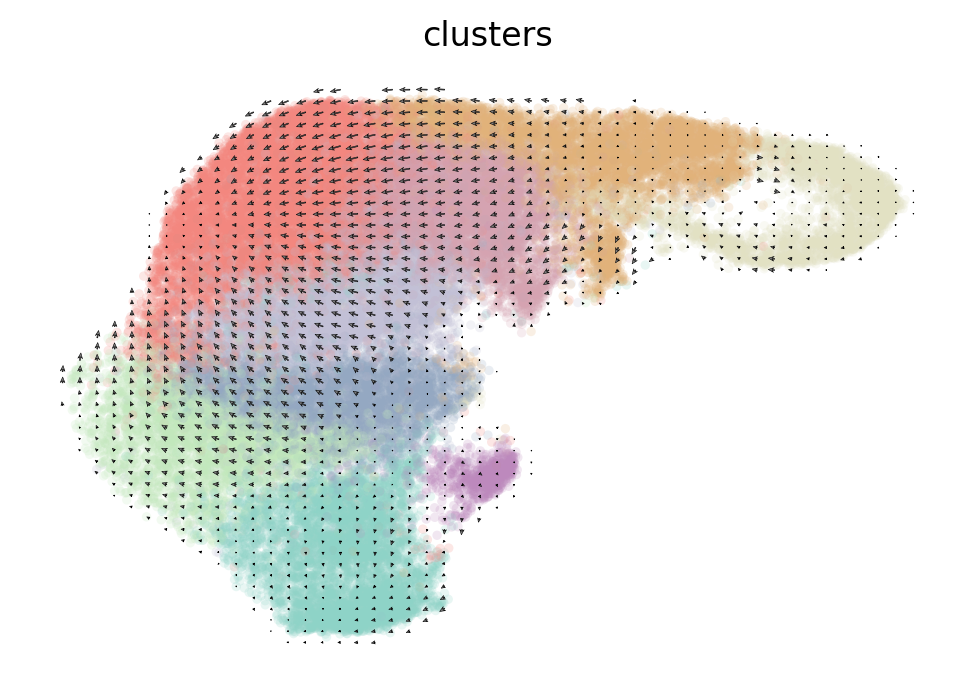

saving figure to file ./figures/scvelo_scvelo.png


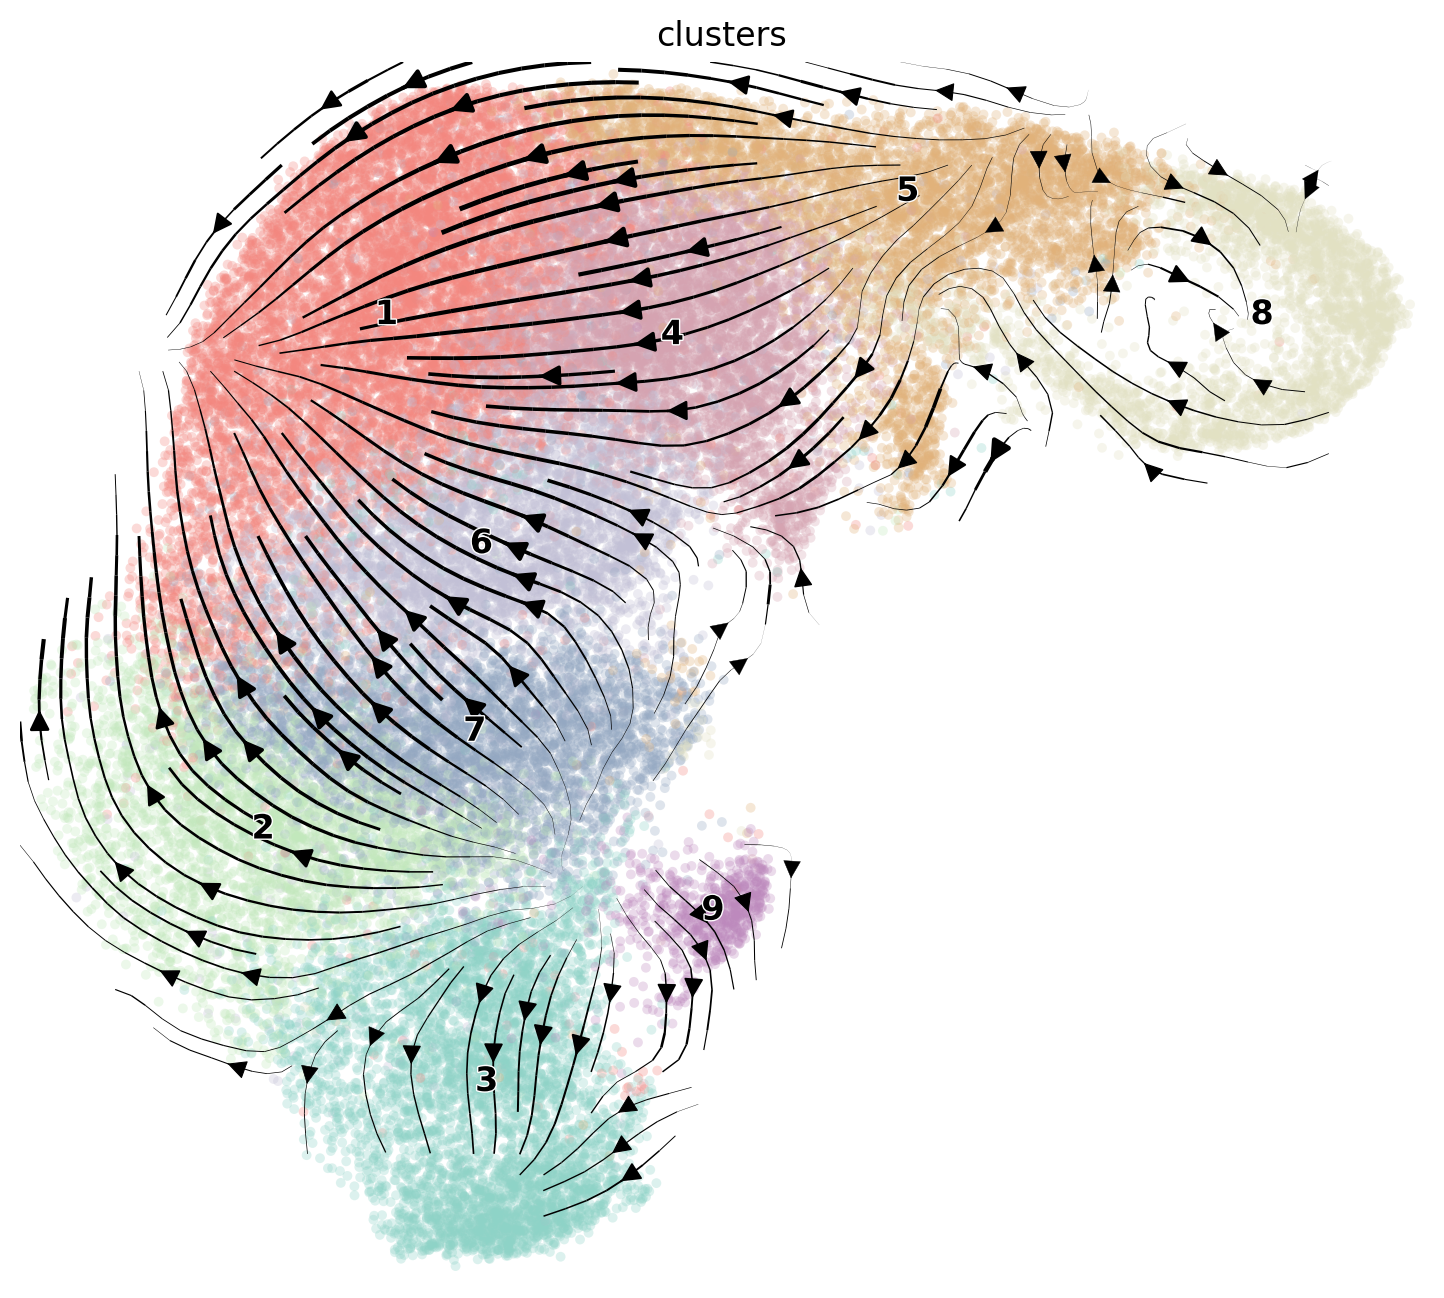

In [25]:
scv.pl.velocity_embedding(HCC_T_cell, basis='umap')
scv.pl.velocity_embedding_grid(HCC_T_cell, basis='umap', 
                               palette = ['#f3877f','#c2e8bc','#8ed3c7','#d5a3b1','#e1b27a', '#c2c0d6', '#94a8c2','#e2e1c3', '#bd89bd'])
scvelo = scv.pl.velocity_embedding_stream(HCC_T_cell, basis='umap', size = 50, arrow_size = 1.5, color = 'clusters', 
                                          figsize = (9,8), save = 'scvelo.png', palette = ['#f3877f','#c2e8bc','#8ed3c7','#d5a3b1','#e1b27a', '#c2c0d6', '#94a8c2','#e2e1c3', '#bd89bd'])


saving figure to file ./figures/scvelo_proportions_ratio.png


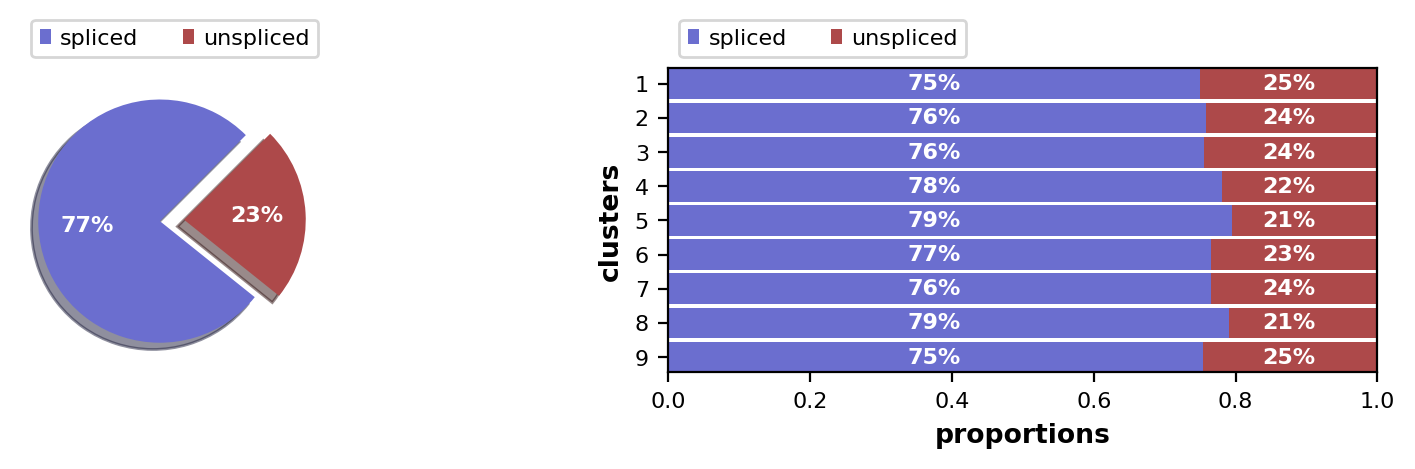

In [86]:
scv.pl.proportions(HCC_T_cell, save = 'ratio.png')

computing terminal states
    identified 8 regions of root cells and 2 regions of end points .
    finished (0:00:16) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:11) --> added 
    'latent_time', shared time (adata.obs)


/home/yang2tseng/.conda/envs/scveloenv/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


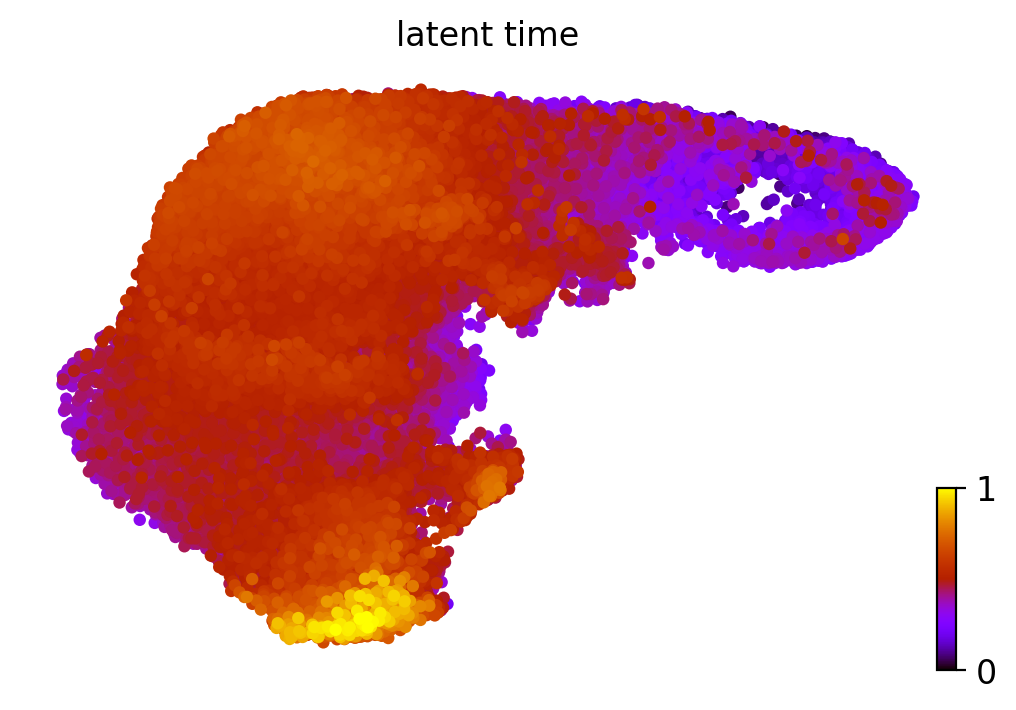

In [87]:
# pseudotime estimation
scv.tl.latent_time(HCC_T_cell)
scv.pl.scatter(HCC_T_cell, color='latent_time', color_map='gnuplot', size=80)

In [90]:
HCC_T_cell.var

vst.mean  vst.variance  vst.variance.expected  \
Mrpl15       0.283737      0.392093               0.377323   
Gm26901      0.001136      0.001286               0.001224   
Cspp1        0.106451      0.131363               0.124302   
Cpa6         0.000076      0.000114               0.000079   
Gm29570      0.000133      0.000170               0.000139   
...               ...           ...                    ...   
mt-Atp8      0.165073      0.222807               0.200721   
mt-Atp6     14.933350    172.995293             168.732002   
mt-Co3      16.911442    231.232500             211.339013   
mt-Cytb      5.917482     45.951268              33.650396   
AC149090.1   0.400110      0.657924               0.584320   

            vst.variance.standardized  vst.variable           Accession  \
Mrpl15                       1.039143             1  ENSMUSG00000033845   
Gm26901                      1.050858             1  ENSMUSG00000097797   
Cspp1                        1.056802             1  ENSMUSG00000056763   
Cpa6                         1.446664             1  ENSMUSG00000042501   
Gm29570                      1.224407             1  ENSMUSG00000101476   
...                               ...           ...                 ...   
mt-Atp8                      1.110036             1  ENSMUSG00000064356   
mt-Atp6                      1.025267             1  ENSMUSG00000064357   
mt-Co3                       1.094131             1  ENSMUSG00000064358   
mt-Cytb                      1.365549             1  ENSMUSG00000064370   
AC149090.1                   1.125965             1  ENSMUSG00000095041   

                 AccessionVersion Aliases     CcdsID  Chromosome  ...  \
Mrpl15      ENSMUSG00000033845.13                           chr1  ...   
Gm26901      ENSMUSG00000097797.6                           chr1  ...   
Cspp1       ENSMUSG00000056763.16                           chr1  ...   
Cpa6        ENSMUSG00000042501.12          CCDS14819        chr1  ...   
Gm29570      ENSMUSG00000101476.1                           chr1  ...   
...                           ...     ...        ...         ...  ...   
mt-Atp8      ENSMUSG00000064356.3                           chrM  ...   
mt-Atp6      ENSMUSG00000064357.1                           chrM  ...   
mt-Co3       ENSMUSG00000064358.1                           chrM  ...   
mt-Cytb      ENSMUSG00000064370.1                           chrM  ...   
AC149090.1   ENSMUSG00000095041.7                     JH584304.1  ...   

           fit_std_s fit_likelihood fit_u0 fit_s0 fit_pval_steady  \
Mrpl15           NaN            NaN    NaN    NaN             NaN   
Gm26901          NaN            NaN    NaN    NaN             NaN   
Cspp1            NaN            NaN    NaN    NaN             NaN   
Cpa6             NaN            NaN    NaN    NaN             NaN   
Gm29570          NaN            NaN    NaN    NaN             NaN   
...              ...            ...    ...    ...             ...   
mt-Atp8          NaN            NaN    NaN    NaN             NaN   
mt-Atp6          NaN            NaN    NaN    NaN             NaN   
mt-Co3           NaN            NaN    NaN    NaN             NaN   
mt-Cytb          NaN            NaN    NaN    NaN             NaN   
AC149090.1       NaN            NaN    NaN    NaN             NaN   

           fit_steady_u fit_steady_s fit_variance fit_alignment_scaling  \
Mrpl15              NaN          NaN          NaN                   NaN   
Gm26901             NaN          NaN          NaN                   NaN   
Cspp1               NaN          NaN          NaN                   NaN   
Cpa6                NaN          NaN          NaN                   NaN   
Gm29570             NaN          NaN          NaN                   NaN   
...                 ...          ...          ...                   ...   
mt-Atp8             NaN          NaN          NaN                   NaN   
mt-Atp6             NaN          NaN          NaN            

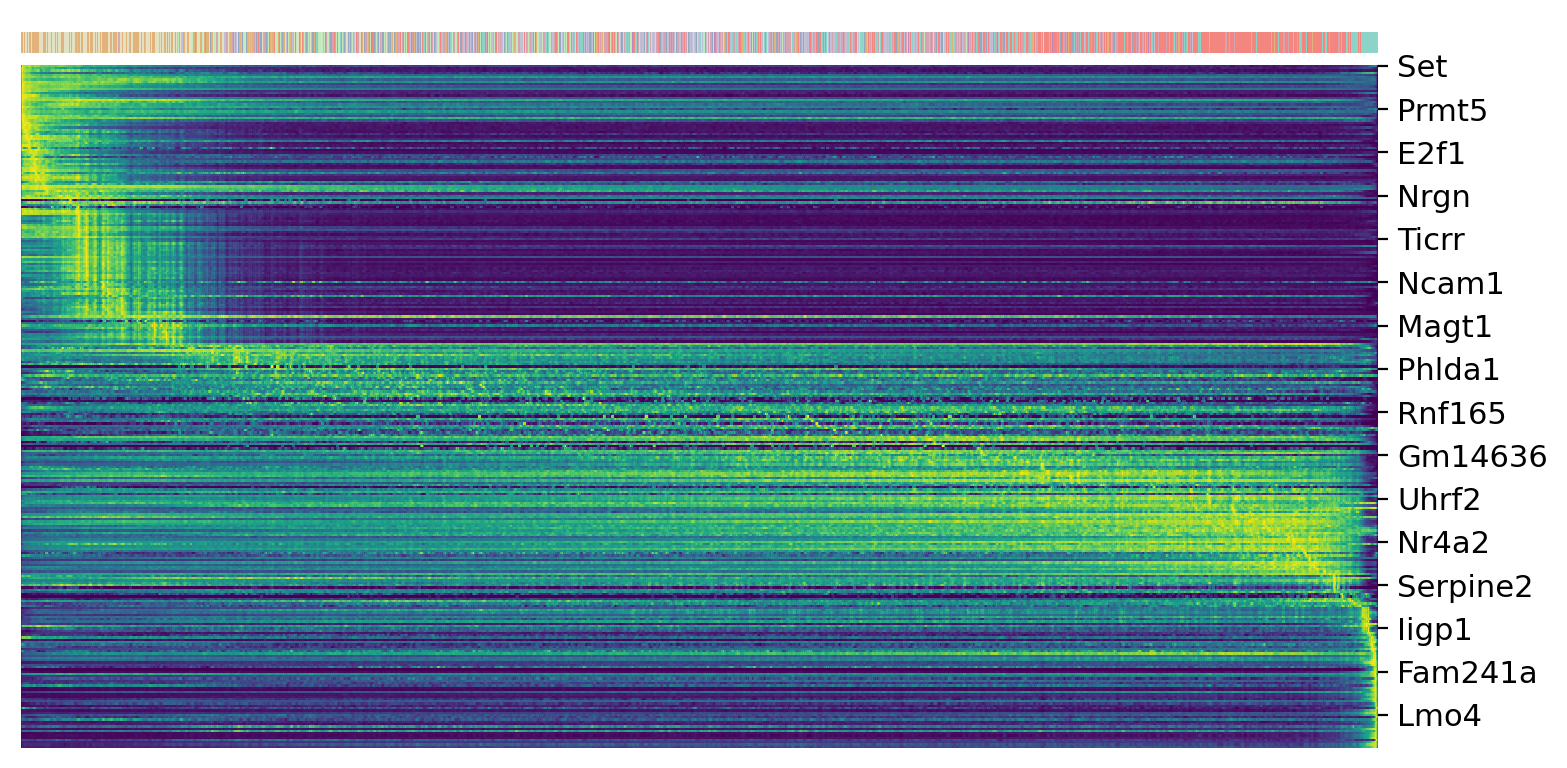

In [97]:
# plot heatmap of Runx2 related genes
top_genes = HCC_T_cell.var['fit_likelihood'].sort_values(ascending=False).index[:300]
top_genes
scv.pl.heatmap(HCC_T_cell, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

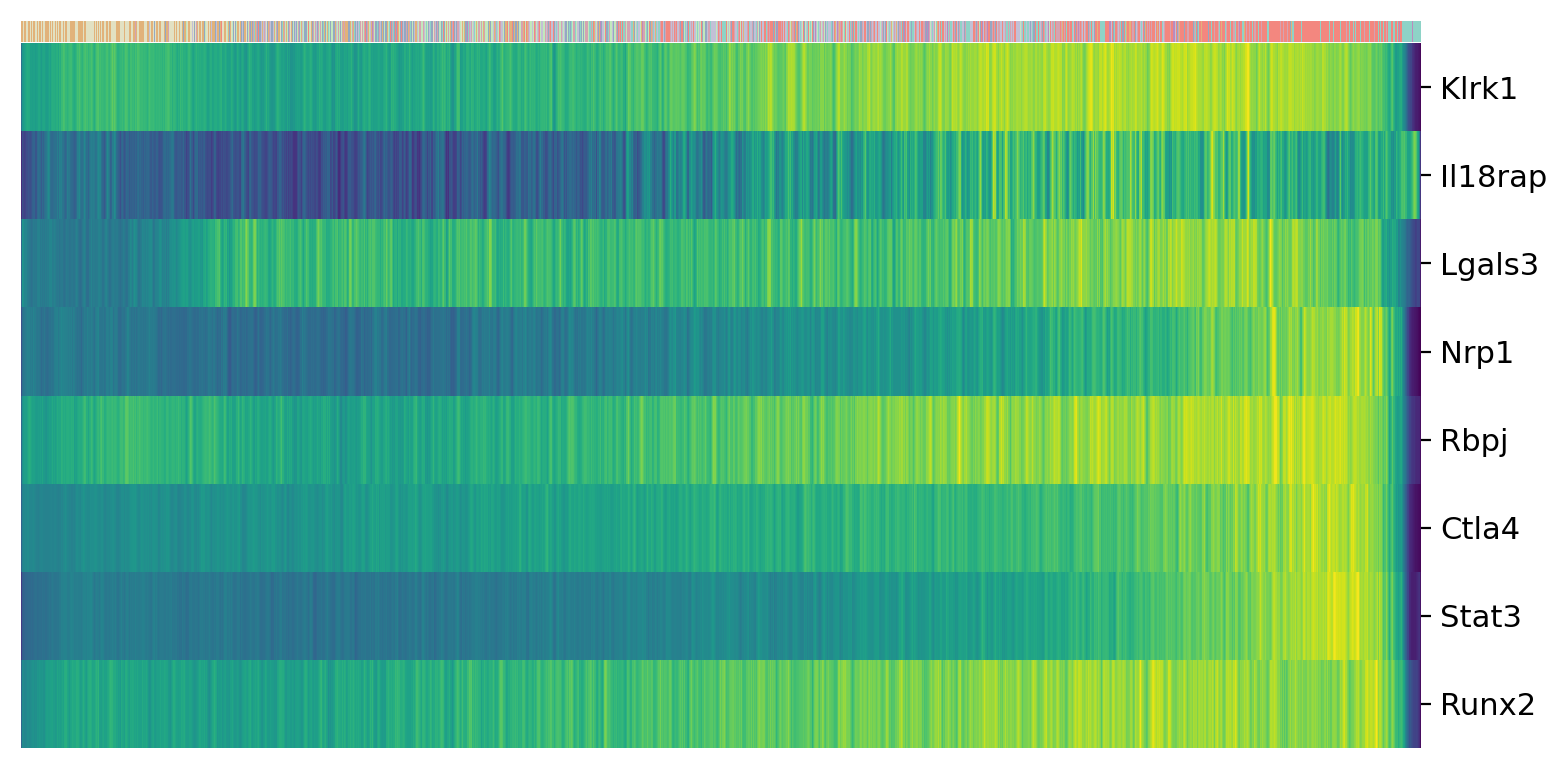

In [96]:
runx2_genes = ['Runx2','Lgals3','Rbpj','Stat3','Ctla4','Nrp1','Klrk1','Il18rap']
scv.pl.heatmap(HCC_T_cell, var_names=runx2_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

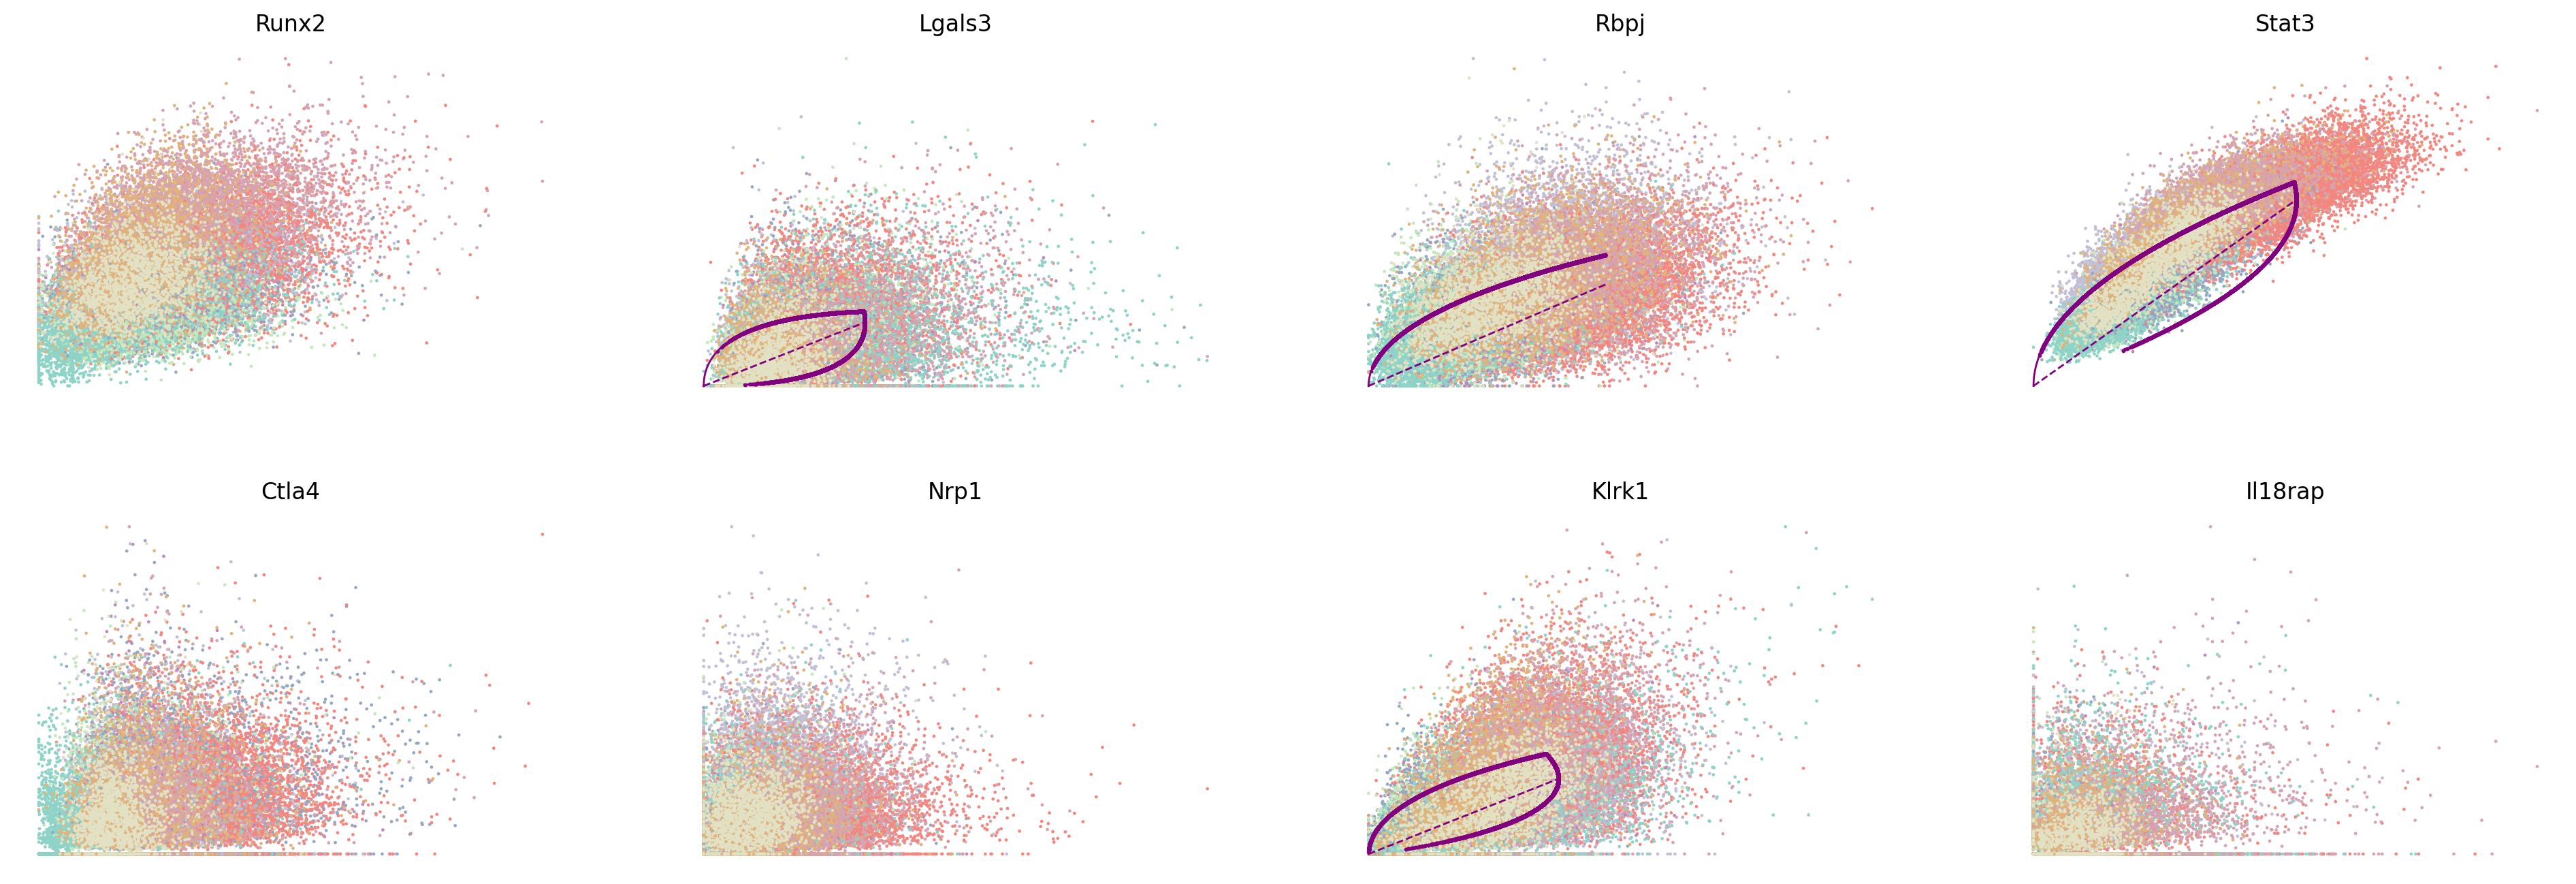

In [98]:
scv.pl.scatter(HCC_T_cell, basis=runx2_genes, ncols=4, frameon=False)

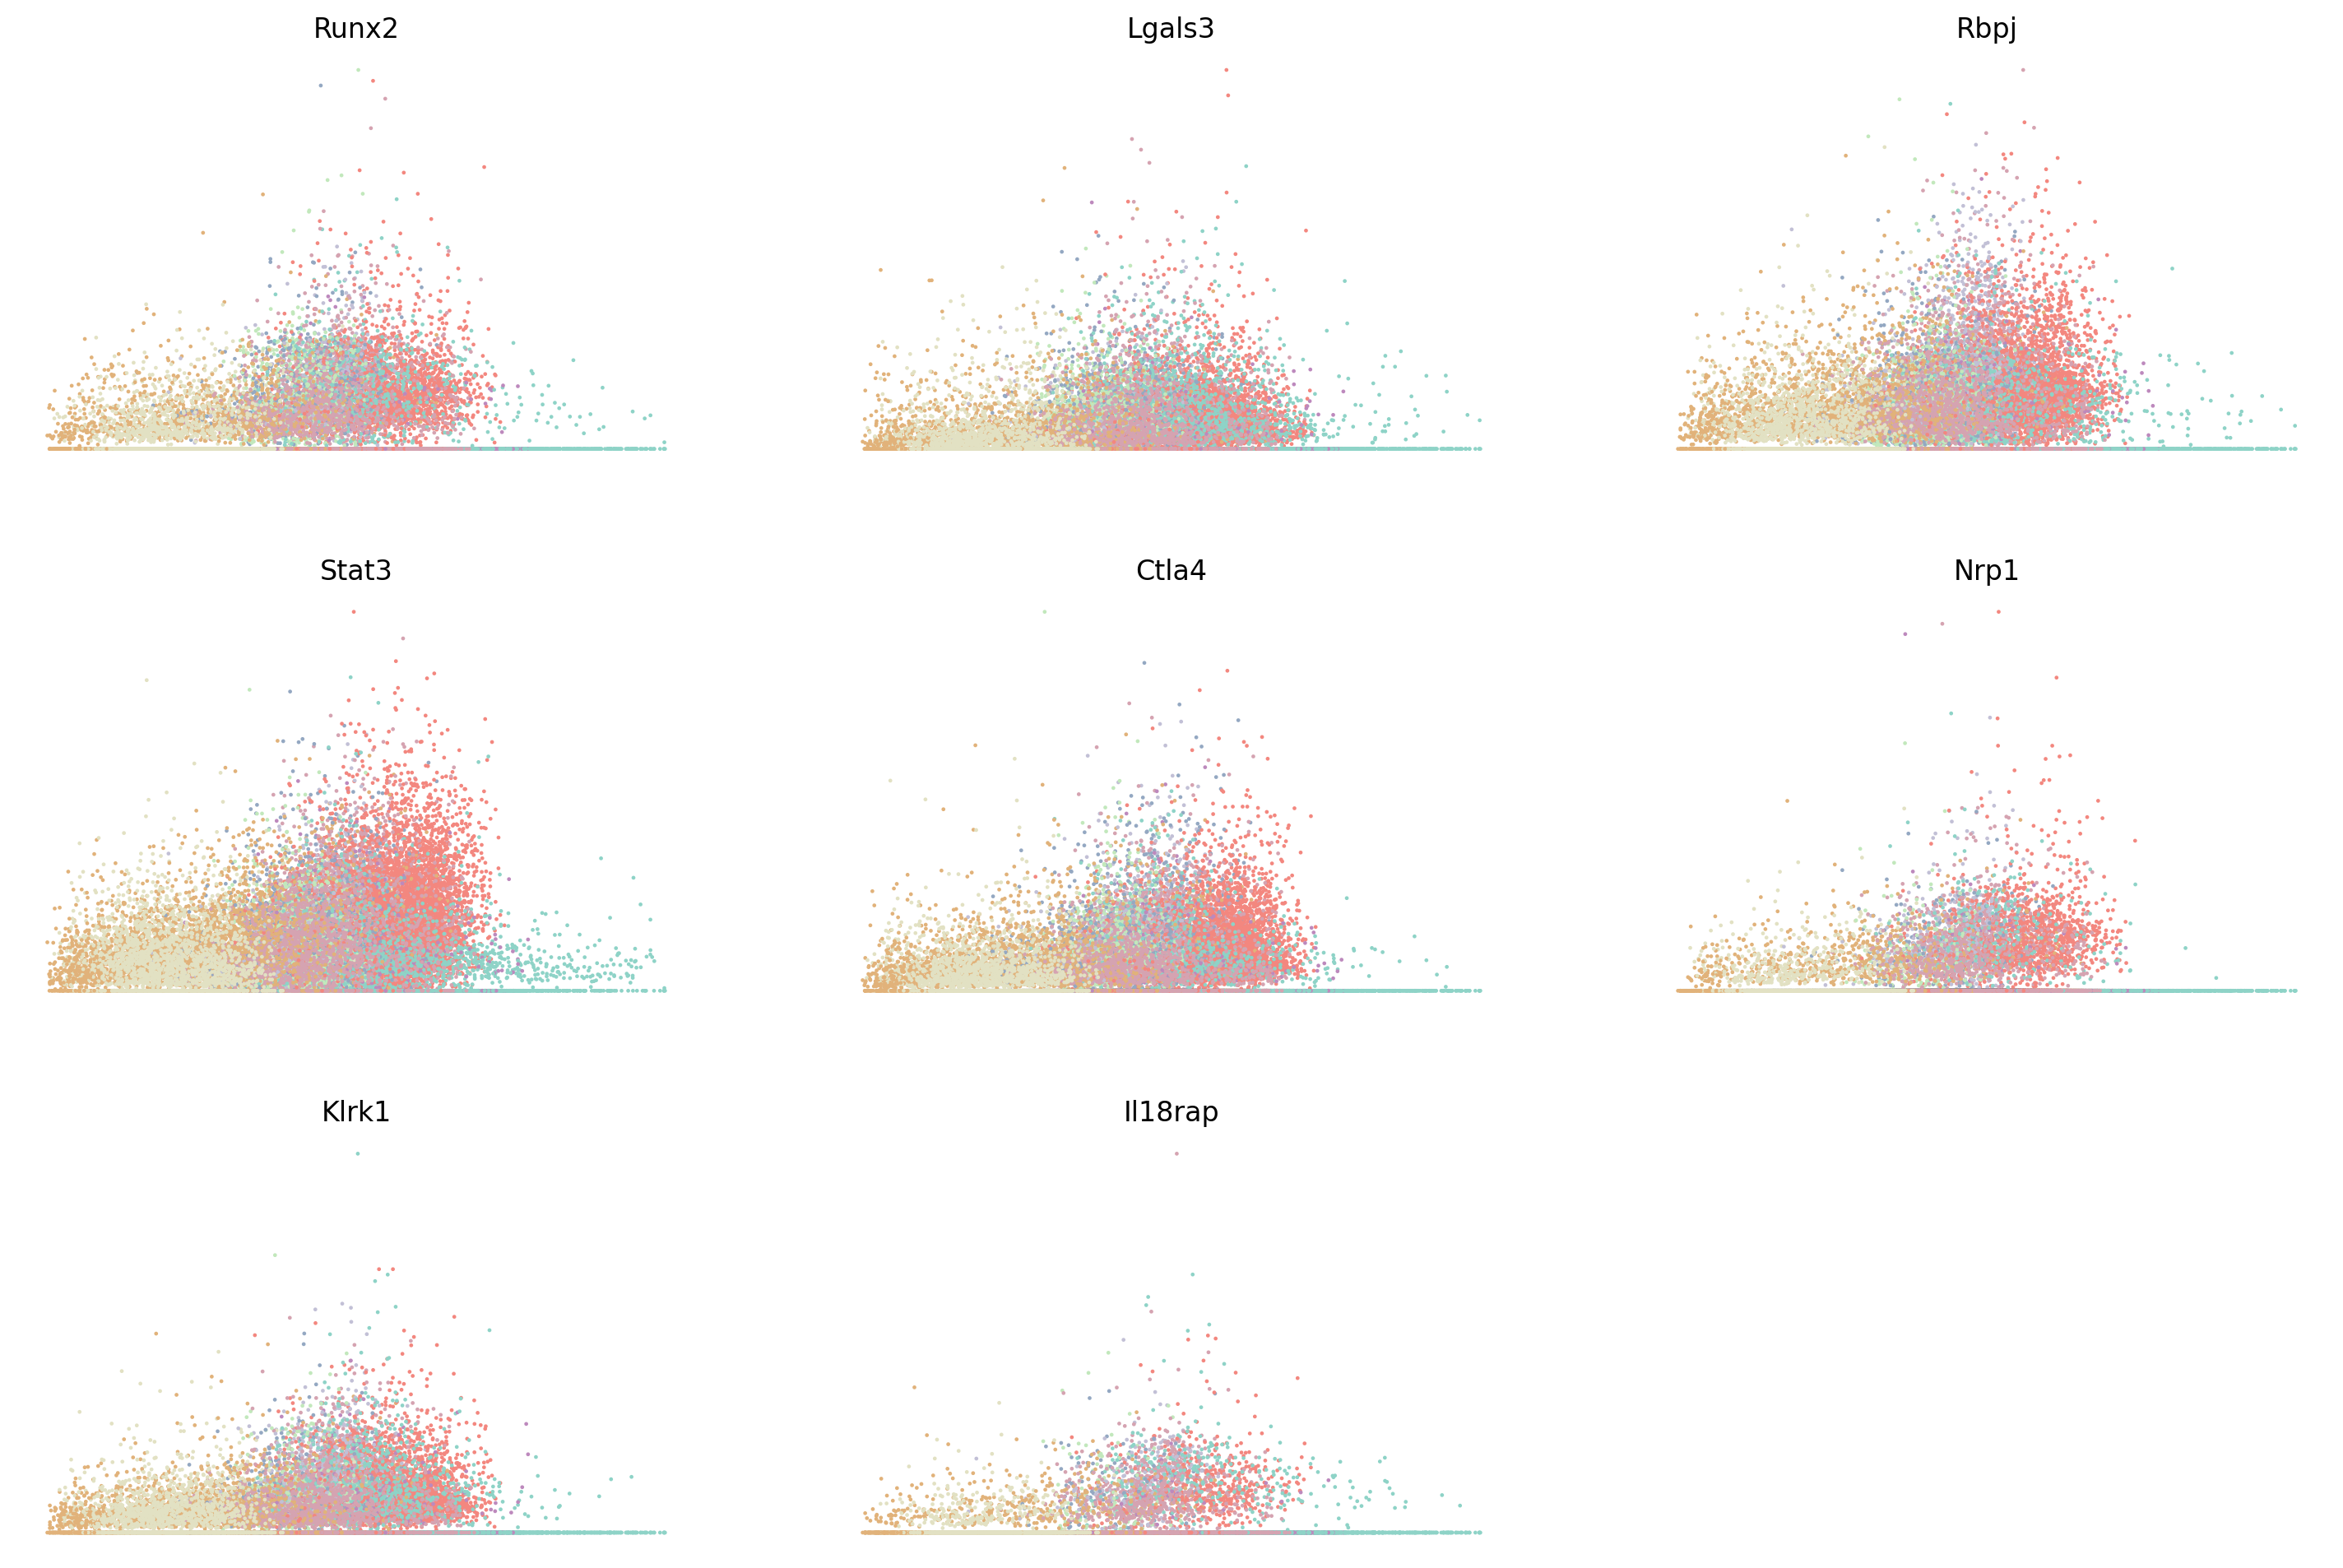

In [101]:
scv.pl.scatter(HCC_T_cell, x='latent_time',y=runx2_genes, ncols=3, frameon=False)

In [102]:
HCC_T_cell.write('HCC_T_scvelo.h5ad')

In [ ]:
from cellrank.tl.kernels import VelocityKernel

vk = VelocityKernel(HCC_T_cell)

In [ ]:
vk.compute_transition_matrix()

In [ ]:
from cellrank.tl.kernels import ConnectivityKernel

ck = ConnectivityKernel(HCC_T_cell).compute_transition_matrix()

In [ ]:
combined_kernel = 0.8 * vk + 0.2 * ck
print(combined_kernel)

In [ ]:
from cellrank.tl.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

In [ ]:
g.compute_schur(n_components=15)
g.plot_spectrum(save ='spectrum.png')

In [ ]:
g.compute_macrostates(n_states=3, cluster_key="clusters")
g.plot_macrostates(save = 'macrostates.png')

In [ ]:
g.plot_macrostates(same_plot=False, save = 'macrostates_separate.png')

In [ ]:
g.plot_macrostates(discrete=True, save = 'macrostates_discrete.png')

In [ ]:
g.compute_terminal_states()

In [ ]:
g.compute_absorption_probabilities(use_petsc=True, n_jobs= 6, solver='gmres')
g.plot_absorption_probabilities(same_plot=False, save = 'absorption.png')